In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tracking

In [5]:
import transform

In [6]:
tracker = tracking.ClusterDBSCAN()

In [7]:
df = pd.read_csv("test.csv")

In [8]:
y_df = df[['particle']]
X_df = df.drop(['hit','particle'], axis=1)

In [9]:
X_train_df = X_df.copy()
y_train_df = y_df.copy()
X_test_df = X_df.copy()
y_test_df = y_df.copy()


In [10]:
tracker.fit(X_train_df.values, y_train_df.values)

[[  1.00000000e-04   2.15168034e+00]
 [  2.00000000e-04   2.11422596e+00]
 [  3.00000000e-04   2.07667501e+00]
 [  4.00000000e-04   2.03896640e+00]
 [  5.00000000e-04   2.00104232e+00]
 [  6.00000000e-04   1.96284291e+00]
 [  7.00000000e-04   1.92430474e+00]
 [  8.00000000e-04   1.88535957e+00]
 [  1.00000000e-04  -8.95546550e-02]
 [  2.00000000e-04  -4.17979451e-02]
 [  3.00000000e-04   6.18187873e-03]
 [  4.00000000e-04   5.44976643e-02]
 [  5.00000000e-04   1.03271692e-01]
 [  6.00000000e-04   1.52637008e-01]
 [  7.00000000e-04   2.02740978e-01]
 [  8.00000000e-04   2.53750074e-01]
 [  1.00000000e-04  -5.03434440e-01]
 [  2.00000000e-04  -5.03444562e-01]
 [  3.00000000e-04  -5.03447936e-01]
 [  4.00000000e-04  -5.03449623e-01]
 [  5.00000000e-04  -5.03450635e-01]
 [  6.00000000e-04  -5.03451310e-01]
 [  7.00000000e-04  -5.03451792e-01]
 [  8.00000000e-04  -5.03452154e-01]
 [  1.00000000e-04  -8.03761788e-01]
 [  2.00000000e-04  -8.37569423e-01]
 [  3.00000000e-04  -8.71461317e-01]
 

In [11]:
y_predicted = tracker.predict(X_test_df.values)

[[  1.00000000e-04   2.15168034e+00]
 [  2.00000000e-04   2.11422596e+00]
 [  3.00000000e-04   2.07667501e+00]
 [  4.00000000e-04   2.03896640e+00]
 [  5.00000000e-04   2.00104232e+00]
 [  6.00000000e-04   1.96284291e+00]
 [  7.00000000e-04   1.92430474e+00]
 [  8.00000000e-04   1.88535957e+00]
 [  1.00000000e-04  -8.95546550e-02]
 [  2.00000000e-04  -4.17979451e-02]
 [  3.00000000e-04   6.18187873e-03]
 [  4.00000000e-04   5.44976643e-02]
 [  5.00000000e-04   1.03271692e-01]
 [  6.00000000e-04   1.52637008e-01]
 [  7.00000000e-04   2.02740978e-01]
 [  8.00000000e-04   2.53750074e-01]
 [  1.00000000e-04  -5.03434440e-01]
 [  2.00000000e-04  -5.03444562e-01]
 [  3.00000000e-04  -5.03447936e-01]
 [  4.00000000e-04  -5.03449623e-01]
 [  5.00000000e-04  -5.03450635e-01]
 [  6.00000000e-04  -5.03451310e-01]
 [  7.00000000e-04  -5.03451792e-01]
 [  8.00000000e-04  -5.03452154e-01]
 [  1.00000000e-04  -8.03761788e-01]
 [  2.00000000e-04  -8.37569423e-01]
 [  3.00000000e-04  -8.71461317e-01]
 

In [13]:
y_predicted

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [14]:
y_test = y_test_df.values

In [16]:
y_pred = y_predicted

In [18]:
len(np.unique(y_test))

10

In [26]:
y_test
particle=0

In [36]:
particle=8
true_hits = y_test[y_test[:,0] == particle]

In [37]:
true_hits

array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8]])

In [38]:
found_hits = y_pred[y_test[:,0] == particle]

In [39]:
found_hits

array([2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
np.unique(y_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [43]:
nsubcluster=len(np.unique(found_hits[found_hits[:] >= 0]))

In [44]:
nsubcluster

1

In [45]:
np.bincount(found_hits[found_hits[:] >= 0])

array([0, 0, 8])

In [46]:
found_hits[found_hits[:] >= 0]

array([2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
np.bincount(found_hits[found_hits[:] >= 0])

array([0, 0, 8])

In [50]:
maxcluster = np.argmax(np.bincount(found_hits[found_hits[:] >= 0]))

In [51]:
maxcluster

2

In [228]:
singletrack =   np.array([[  4.00000000e+00,   6.94003245e+02,  -7.19971872e+02],
       [  4.00000000e+00,   1.33854153e+03,  -1.48603721e+03],
       [  4.00000000e+00,   1.93112680e+03,  -2.29581125e+03],
       [  4.00000000e+00,   2.46925623e+03,  -3.14686728e+03],
       [  4.00000000e+00,   2.95038324e+03,  -4.03673615e+03],
       [  4.00000000e+00,   3.37190123e+03,  -4.96289049e+03],
       [  4.00000000e+00,   3.73112574e+03,  -5.92272747e+03],
       [  4.00000000e+00,   4.02527449e+03,  -6.91354940e+03]])

In [229]:
y=tracker.predict(X=singletrack[:,1:3])

In [230]:
singletrack[:,1:3]

array([[  694.003245,  -719.971872],
       [ 1338.54153 , -1486.03721 ],
       [ 1931.1268  , -2295.81125 ],
       [ 2469.25623 , -3146.86728 ],
       [ 2950.38324 , -4036.73615 ],
       [ 3371.90123 , -4962.89049 ],
       [ 3731.12574 , -5922.72747 ],
       [ 4025.27449 , -6913.5494  ]])

In [231]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1])

In [232]:
twotracks = np.array([[  4.00000000e+00,   6.94003245e+02,  -7.19971872e+02],
       [  4.00000000e+00,   1.33854153e+03,  -1.48603721e+03],
       [  4.00000000e+00,   1.93112680e+03,  -2.29581125e+03],
       [  4.00000000e+00,   2.46925623e+03,  -3.14686728e+03],
       [  4.00000000e+00,   2.95038324e+03,  -4.03673615e+03],
       [  4.00000000e+00,   3.37190123e+03,  -4.96289049e+03],
       [  4.00000000e+00,   3.73112574e+03,  -5.92272747e+03],
       [  4.00000000e+00,   4.02527449e+03,  -6.91354940e+03],
       [  8.00000000e+00,   9.12744875e+02,   4.08530039e+02],
       [  8.00000000e+00,   1.82549010e+03,   8.17059292e+02],
       [  8.00000000e+00,   2.73823533e+03,   1.22558854e+03],
       [  8.00000000e+00,   3.65098056e+03,   1.63411780e+03],
       [  8.00000000e+00,   4.56372578e+03,   2.04264705e+03],
       [  8.00000000e+00,   5.47647101e+03,   2.45117630e+03],
       [  8.00000000e+00,   6.38921624e+03,   2.85970555e+03],
       [  8.00000000e+00,   7.30196147e+03,   3.26823481e+03]])

In [233]:
y=tracker.predict(X=twotracks[:,1:3])

In [234]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [235]:
y=tracker.predict(X=X_df.values)

In [236]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [237]:
tracker.cls.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [238]:
# POLAR COORDINATES

In [239]:
np_hits_polar = polar(twotracks[:,1:3])

In [240]:
np_hits_polar

array([[ 1.        , -0.80376179],
       [ 2.        , -0.83756942],
       [ 3.        , -0.87146132],
       [ 4.        , -0.90547233],
       [ 5.        , -0.93964255],
       [ 5.99999999, -0.97401443],
       [ 7.        , -1.00863286],
       [ 8.        , -1.04354563],
       [ 1.        ,  0.420843  ],
       [ 2.        ,  0.42084257],
       [ 3.        ,  0.42084242],
       [ 4.        ,  0.42084235],
       [ 5.        ,  0.42084231],
       [ 6.        ,  0.42084228],
       [ 7.        ,  0.42084226],
       [ 8.00000001,  0.42084224]])

In [246]:
tracker.fit(X_df.values, y_df.values)

In [247]:
y=cls.fit_predict(X=polar(twotracks[:,1:3]))

In [248]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [249]:
 plt.scatter(np_hits_xy[:,1],np_hits_xy[:,0])

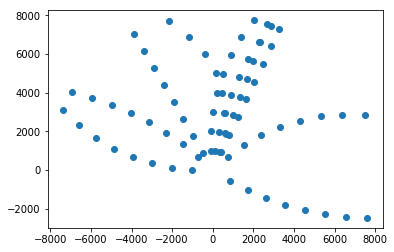

In [145]:
plt.show()

In [146]:
 plt.scatter(np_hits_polar[:,1],np_hits_polar[:,0])

In [147]:
plt.xlim([-np.pi,np.pi])
plt.ylim([-0.0001,0.001])

(-0.0001, 0.001)

In [148]:
 plt.scatter(np_hits_polar[:,1],np_hits_polar[:,0])

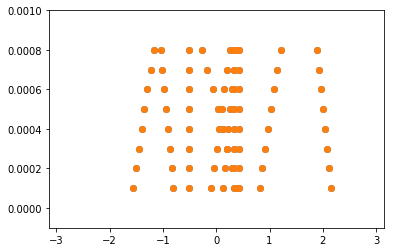

In [149]:
plt.show()

In [157]:
tracker.fit_predict(X=np_hits_polar)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [151]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])